In [47]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb

ubicacion = r"C:\Users\randy\EBAC.PRACTICAS\Mall_Customers.csv"

from sklearn.cluster import KMeans

dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
fields = dataset.iloc[:,[3,4]].values  # Esto sirve paa que tome primero todos los renglones, pero solo de las ultimas dos columnas
print(fields)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
wcss = [] # Lista Vacia donde vamos a guardar el numero de clusters que manejemos 
for index in range(1,11): # Indicandole que vamos a hacer una prueba con 10 clusters
    kmeans = KMeans(n_clusters = index, init = 'k-means++', random_state = 2) # Inicializamos el modelo de KMeans con el número de clusters y el método de inicialización
    kmeans.fit(fields) # Ajustamos el modelo a los datos

    wcss.append(kmeans.inertia_) # Guardamos el valor de la inercia en la lista wcss

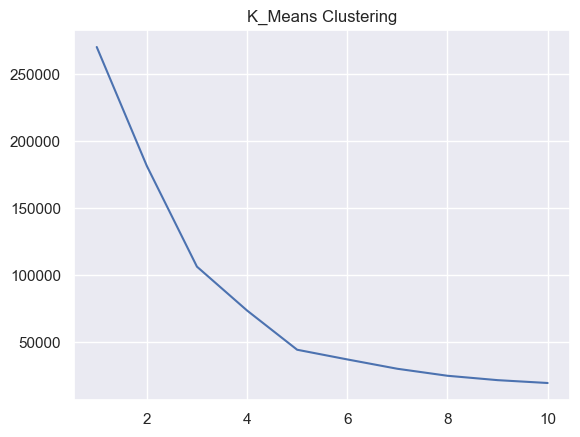

In [51]:
# Graficacion del codo de Jambu
sb.set()
mp.plot(range(1,11), wcss) # Graficamos el numero de clusters contra la inercia
mp.title('K_Means Clustering')
# mp.xlabel('Numero de Clusters')
# mp.ylabel('WCSS')
mp.show() # Weighted Cluster sun of squares

In [52]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) # Inicializamos el modelo de KMeans con el número de clusters y el método de inicialización
cluster_values = kmeans.fit_predict(fields) # Ajustamos el modelo a los datos y predecimos los clusters

print(cluster_values) # Imprimimos los valores de los clusters

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


# Como se interpreta esto

In [53]:
# Significa que el primer valor de cluster_values es el primer renglon de la dataset y lo ha clasificado como 4 en este caso

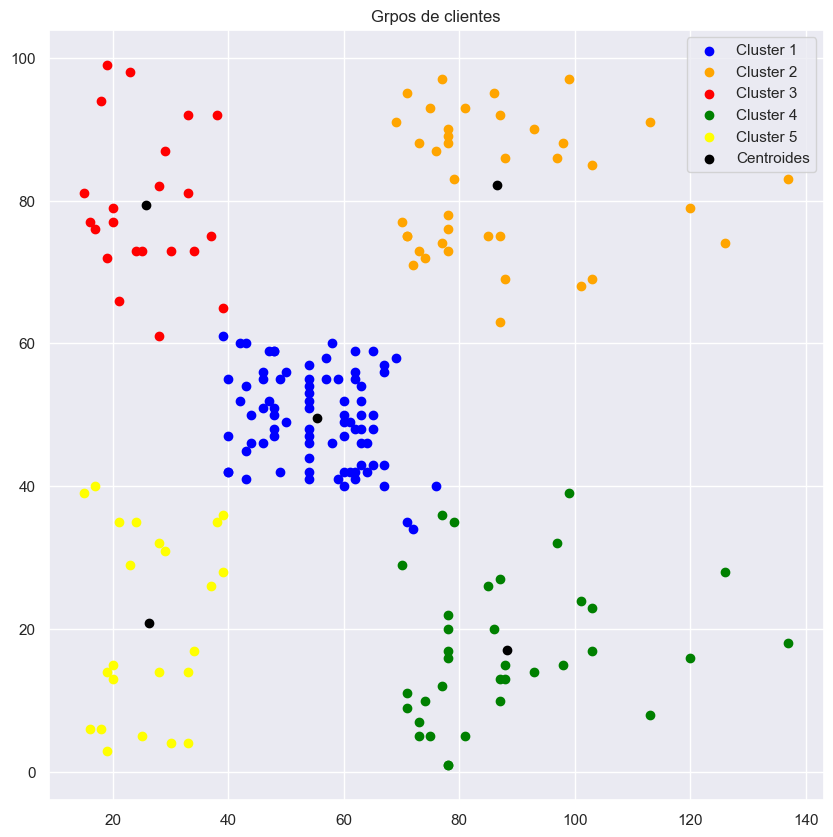

In [54]:
mp.figure(figsize = (10,10))
mp.scatter(fields[cluster_values == 0,0], fields[cluster_values == 0,1], c = 'blue', label='Cluster 1')
mp.scatter(fields[cluster_values == 1,0], fields[cluster_values == 1,1], c = 'orange', label='Cluster 2')
mp.scatter(fields[cluster_values == 2,0], fields[cluster_values == 2,1], c = 'red', label='Cluster 3')
mp.scatter(fields[cluster_values == 3,0], fields[cluster_values == 3,1], c = 'green', label='Cluster 4')
mp.scatter(fields[cluster_values == 4,0], fields[cluster_values == 4,1], c = 'yellow', label='Cluster 5')
mp.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', label='Centroides')

mp.title('Grpos de clientes')
mp.xlabel = 'Annual Income'
mp.ylabel = 'Spending score'
mp.legend()
# Centroides o centros de gravedad

In [55]:
# Criterio de suelueta (Silhouette)
from sklearn import datasets
from sklearn.metrics import silhouette_score 

In [ ]:
X = dataset.iloc[:, [3,4]].to_numpy() # [:, [3,4]] sirve para que tome todos los renglones, pero solo de las ultimas dos columnas
    kmeans = KMeans(n_clusters = j, random_state=42)
    kmeans.fit_predict(X)
    # Calculamos el score de silueta
    score = silhouette_score(X, kmeans.labels_, metric='euclidean')
    print('Score Silhouette;', 'k = ', j, ':', score)

Score Silhouette; k =  2 : 0.2968969162503008
Score Silhouette; k =  3 : 0.46761358158775435
Score Silhouette; k =  4 : 0.4931963109249047
Score Silhouette; k =  5 : 0.553931997444648
Score Silhouette; k =  6 : 0.53976103063432
Score Silhouette; k =  7 : 0.5288104473798049
Score Silhouette; k =  8 : 0.45481197931195283
Score Silhouette; k =  9 : 0.4561091950997367
Score Silhouette; k =  10 : 0.4410568674364981
Score Silhouette; k =  11 : 0.4489710248005492


# Cuando utilizar este indicador:
# Cuando ya se haya ulitilizado el CODO de Yambu y no queda muy claro lo que nosotros queremos hacer

In [57]:
# Ahora implementaremos mas columnas y para esto utilizaremos el proceso PCA

In [58]:
# Algoritmo KMeans aplicado a 3 columnas de nuestra base Original
# Bajo una trnasformacion PCA 

fields2 = dataset.iloc[:, [2,3,4]].values
print(fields2)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

In [59]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2) # Definimos el número de componentes principales que queremos conservar
pca.fit(fields2)
field2 = pca.transform(fields2) 
fields2

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [60]:
wcss2 = [] # Lista Vacia donde vamos a guardar el numero de clusters que manejemos 
for index in range(1,11): # Indicandole que vamos a hacer una prueba con 10 clusters
    kmeans = KMeans(n_clusters = index, init = 'k-means++', random_state = 2) # Inicializamos el modelo de KMeans con el número de clusters y el método de inicialización
    kmeans.fit(fields) # Ajustamos el modelo a los datos

    wcss2.append(kmeans.inertia_) # Guardamos el valor de la inercia en la lista wcss

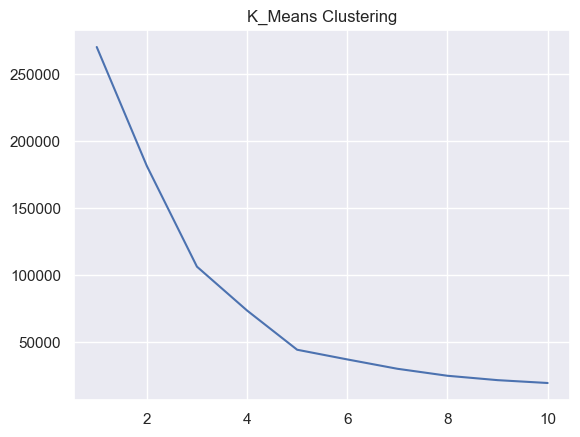

In [61]:
# Graficacion del codo de Jambu
sb.set()
mp.plot(range(1,11), wcss2) # Graficamos el numero de clusters contra la inercia
mp.title('K_Means Clustering')
# mp.xlabel('Numero de Clusters')
# mp.ylabel('WCSS')
mp.show() # Weighted Cluster sun of squares

In [62]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) # Inicializamos el modelo de KMeans con el número de clusters y el método de inicialización
cluster_values = kmeans.fit_predict(fields2) # Ajustamos el modelo a los datos y predecimos los clusters

print(cluster_values) # Imprimimos los valores de los clusters

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


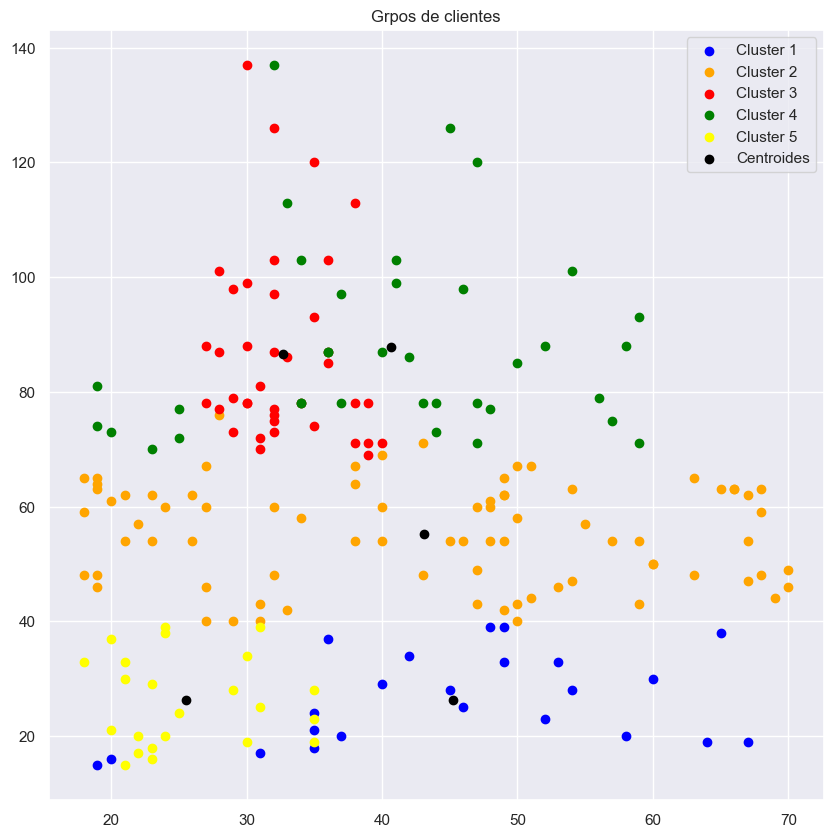

In [63]:
mp.figure(figsize = (10,10))
mp.scatter(fields2[cluster_values == 0,0], fields2[cluster_values == 0,1], c = 'blue', label='Cluster 1')
mp.scatter(fields2[cluster_values == 1,0], fields2[cluster_values == 1,1], c = 'orange', label='Cluster 2')
mp.scatter(fields2[cluster_values == 2,0], fields2[cluster_values == 2,1], c = 'red', label='Cluster 3')
mp.scatter(fields2[cluster_values == 3,0], fields2[cluster_values == 3,1], c = 'green', label='Cluster 4')
mp.scatter(fields2[cluster_values == 4,0], fields2[cluster_values == 4,1], c = 'yellow', label='Cluster 5')
mp.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', label='Centroides')

mp.title('Grpos de clientes')
mp.xlabel = 'Annual Income'
mp.ylabel = 'Spending score'
mp.legend()
# Centroides o centros de gravedad